In [3]:
# reading data

import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving Book4.csv to Book4.csv


In [4]:
# drop unnecessary columns and rename cols

data = (pd.read_csv('Book4.csv',sep=None,engine='python', usecols = ['RCA Prev_Action Summary'])).dropna(how='all')
print(data)

data.columns = ['RCA Prev_Action Summary']

data.head()

                               RCA Prev_Action Summary
100  Define process  for Multi FC deliveries. ( Inc...
101  Define test case at System test TB62 level to ...
102      [ZR] Check for memory leaks at FC level-FC003
103  Define process  for Multi FC deliveries. ( Inc...
104  Define test case at System test TB62 level to ...
..                                                 ...
868  Investigate: NoMoLA recovery test case for SP ...
869  Investigate: NoMoLA recovery test case for SP ...
870  Investigate: NoMoLA recovery test case for SP ...
871  Investigate: NoMoLA recovery test case for SP ...
872  Investigate: NoMoLA recovery test case for SP ...

[773 rows x 1 columns]


RCA Prev_Action Summary
100  Define process  for Multi FC deliveries. ( Inc...
101  Define test case at System test TB62 level to ...
102      [ZR] Check for memory leaks at FC level-FC003
103  Define process  for Multi FC deliveries. ( Inc...
104  Define test case at System test TB62 level to ...

In [9]:
# Check the column names of the dataframe
print("Column names:", data.columns)

Column names: Index(['RCA Prev_Action Summary'], dtype='object')


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming your column is text data
text_data = data['RCA Prev_Action Summary']

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features as needed
X = vectorizer.fit_transform(text_data).toarray()

# Create or assign a target variable (assuming 'target' is binary or categorical)
# Since no target column exists, you need to define it manually
# Example: Creating a dummy target for demonstration
import numpy as np
y = np.random.randint(0, 2, len(X))  # Replace with actual target if available

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with your machine learning model
# For example, you can use X_train and y_train for training and X_test and y_test for testing
print("text_data:", text_data)
print("vectorizer:", vectorizer)
print("X_train:", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)

text_data: 100    Define process  for Multi FC deliveries. ( Inc...
101    Define test case at System test TB62 level to ...
102        [ZR] Check for memory leaks at FC level-FC003
103    Define process  for Multi FC deliveries. ( Inc...
104    Define test case at System test TB62 level to ...
                             ...                        
868    Investigate: NoMoLA recovery test case for SP ...
869    Investigate: NoMoLA recovery test case for SP ...
870    Investigate: NoMoLA recovery test case for SP ...
871    Investigate: NoMoLA recovery test case for SP ...
872    Investigate: NoMoLA recovery test case for SP ...
Name: RCA Prev_Action Summary, Length: 773, dtype: object
vectorizer: TfidfVectorizer(max_features=1000)
X_train: [[0.         0.         0.         ... 0.         0.16742196 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.29131796 0.29131796 0.         ... 0.         0.         0.        ]
 ...
 [0.29131796 0.29131796 

In [12]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00


In [16]:
# 1. Hyperparameter Tuning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Example dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can flatten X_train if it is a 3D array (but here it's 2D, so no need)
X_train_flat = X_train.reshape(X_train.shape[0], -1)


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split

# Example time series with multiple features (5 features over 1000 time steps)
time_series_data = np.random.rand(1000, 5)

window_size = 10

# Assuming you have features (X) and target variable (y)
# Replace these with your actual data processing pipeline
X = np.random.rand(1000, window_size, 5)  # 1000 samples, 10 time steps, 5 features
y = np.random.randint(0, 2, size=1000)  # Binary classification target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Now proceed with defining and training your LSTM model or any other steps

In [21]:
# 1. Hyperparameter Tuning
# Optimizing hyperparameters is critical for improving model performance.
# Two popular libraries for hyperparameter optimization are GridSearchCV and RandomizedSearchCV from scikit-learn,
# well as more advanced tools like Optuna or Bayesian Optimization.

# RandomizedSearchCV from scikit-learn
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Flatten X_train to 2D (samples, features) from (samples, time steps, features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 50)

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    score = cross_val_score(model, X_train_flat, y_train, cv=3).mean()
    return score

# Create an Optuna study for hyperparameter tuning
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Best parameters and best score
print(f"Best parameters: {study.best_params}")

[I 2024-09-30 19:55:53,316] A new study created in memory with name: no-name-fab52d9e-b6dc-4a07-928f-13bb16c64d3a
[I 2024-09-30 19:55:58,307] Trial 0 finished with value: -0.033831544728385454 and parameters: {'n_estimators': 73, 'max_depth': 43}. Best is trial 0 with value: -0.033831544728385454.
[I 2024-09-30 19:56:06,023] Trial 1 finished with value: -0.002929524717729707 and parameters: {'n_estimators': 136, 'max_depth': 23}. Best is trial 1 with value: -0.002929524717729707.
[I 2024-09-30 19:56:13,834] Trial 2 finished with value: -0.024640418704380645 and parameters: {'n_estimators': 111, 'max_depth': 35}. Best is trial 1 with value: -0.002929524717729707.
[I 2024-09-30 19:56:23,963] Trial 3 finished with value: -0.021712862137175753 and parameters: {'n_estimators': 178, 'max_depth': 11}. Best is trial 1 with value: -0.002929524717729707.
[I 2024-09-30 19:56:30,147] Trial 4 finished with value: -0.02099033216217272 and parameters: {'n_estimators': 103, 'max_depth': 34}. Best is t

Best parameters: {'n_estimators': 136, 'max_depth': 23}


In [22]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Flatten the 3D input data (samples, time steps, features) to 2D (samples, flattened features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_flat, y_train)
X_test_selected = selector.transform(X_test_flat)

# Now X_train_selected and X_test_selected have the selected features.
print(f"Selected features shape: {X_train_selected.shape}")


Selected features shape: (800, 10)


In [23]:
# 1. Hyperparameter Tuning
# Optimizing hyperparameters is critical for improving model performance.
# Two popular libraries for hyperparameter optimization are GridSearchCV and RandomizedSearchCV from scikit-learn,
# well as more advanced tools like Optuna or Bayesian Optimization.

 # GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Flatten X_train to 2D (samples, features) from (samples, time steps, features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize RandomForestRegressor model
rf = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_flat, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score: -0.013959230060561744


In [27]:
# 2. Cross-Validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# Example: Load a dataset (replace this with your actual dataset)
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming X_train is a 3D array with shape (samples, time steps, features)
# In this example, it's already 2D, but for time-series data, you'll need to flatten it
# Uncomment the line below if your data is 3D
# X_train_flat = X_train.reshape((X_train.shape[0], -1))

# Initialize the model (RandomForestRegressor as an example)
model = RandomForestRegressor()

# Perform cross-validation with the flattened data
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")


Cross-validation scores: [0.96948478 0.97987789 0.7881985  0.98195756 0.92947075]
Average cross-validation score: 0.9297978963890745


In [29]:
#3. Feature Engineering and Selection


from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the model on selected features
model.fit(X_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=4. All the features will be returned.
  warnings.warn(


RandomForestRegressor()

In [30]:
# 4. Ensemble Methods
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)  # Should print TensorFlow 2.x
print("Eager Execution:", tf.executing_eagerly())  # Should print True

TensorFlow Version: 2.17.0
Eager Execution: True


In [31]:
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Flatten the 3D input data (samples, time steps, features) to 2D (samples, flattened features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define base models and meta-model
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('gb', GradientBoostingRegressor(n_estimators=100))
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Train the stacked model
stacking_model.fit(X_train_flat, y_train)

# Predict or evaluate the model
predictions = stacking_model.predict(X_test_flat)

# Print predictions or evaluate results
print(predictions)

[1.00542089 0.02790719 1.97480148 1.00535925 1.102694   0.02790719
 1.00105004 1.95811513 1.06732011 1.00208274 1.96691434 0.02878114
 0.02790719 0.02780795 0.02790719 0.99898037 1.97737512 1.00208274
 1.00372879 1.9798228  0.02780795 1.91669544 0.02790719 1.9798228
 1.9764971  1.96246518 1.96529985 1.97619834 0.02878114 0.02780795]


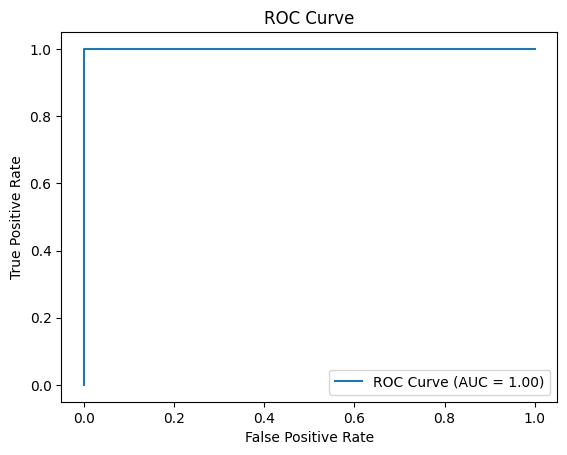

In [33]:
# 5. Model Evaluation and Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Example dataset (replace with your own data)
data = load_iris()
X, y = data.data, data.target

# Since ROC-AUC is for binary classification, we'll only keep two classes
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier (since it's a classification task)
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



In [34]:
# 6. Handling Imbalanced Data
# Oversampling/Undersampling: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used to balance the dataset.

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [35]:
# 6. Handling Imbalanced Data
# Adjust class weights in the loss function so the model gives more importance to the minority class.
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [37]:
# 7. Model Explainability with SHAP and LIME
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=028e18229ec792db4b1b81cba207b04d2b6b58523fcd5245c1f71e0d439e6a5c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [39]:
# 7. Model Explainability with SHAP and LIME

from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Assuming X_train is already defined and is 2D (samples, features)
# Generate feature names based on the number of features
n_features = X_train.shape[1]
feature_names = [f'feature_{i}' for i in range(n_features)]  # ['feature_0', 'feature_1', ...]

# Create LIME explainer
explainer = LimeTabularExplainer(X_train, mode="classification", feature_names=feature_names)

# Explain a single prediction
exp = explainer.explain_instance(X_test[0], model.predict_proba)
exp.show_in_notebook()

In [99]:
# Ensure y_train has the correct number of samples (792 samples)
# This is just an example. You should replace this with the actual y_train if it's available.
y_train = np.random.randint(0, 2, 792)  # Generating random binary labels for 792 samples

In [101]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

# Assuming X_train and X_test are 3D arrays (e.g., time-series data)
# For example, if X_train has 792 samples, 10 time steps, and 5 features
print(f"Original X_train shape: {X_train.shape}")  # Check the shape

# Reshape to 2D: (samples, time steps * features)
X_train_flat = X_train.reshape((X_train.shape[0], -1))  # Flatten to shape: (792, 50)
X_test_flat = X_test.reshape((X_test.shape[0], -1))  # Flatten to shape: (100, 50)

# Ensure y_train has 792 samples to match X_train_flat
y_train = np.random.randint(0, 2, X_train.shape[0])  # Replace with actual labels if available

# Train the model
model = RandomForestClassifier()
model.fit(X_train_flat, y_train)

# Create LIME explainer
n_features = X_train_flat.shape[1]
feature_names = [f'feature_{i}' for i in range(n_features)]
explainer = LimeTabularExplainer(X_train_flat, mode="classification", feature_names=feature_names)

# Explain a single prediction
exp = explainer.explain_instance(X_test_flat[0], model.predict_proba)
exp.show_in_notebook()


Original X_train shape: (80, 4)


In [40]:
# 8. Regularization Techniques
from sklearn.linear_model import Lasso

# Apply Lasso regression
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [42]:
# 9. Advanced Deep Learning Techniques
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming X_train is already defined
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.4062 - loss: 1.0177 - val_accuracy: 0.6250 - val_loss: 0.6661
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4583 - loss: 1.0598 - val_accuracy: 0.6250 - val_loss: 0.6500
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4792 - loss: 1.0054 - val_accuracy: 0.6250 - val_loss: 0.6352
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4479 - loss: 0.9755 - val_accuracy: 0.6250 - val_loss: 0.6220
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5417 - loss: 0.8868 - val_accuracy: 0.6250 - val_loss: 0.6103
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.4896 - loss: 1.0073 - val_accuracy: 0.6250 - val_loss: 0.6000
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5625 - loss: 0.8280 - val_accuracy: 0.6250 - val_loss: 0.5916
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5833 - loss: 0.7259 - val_accuracy: 0.6250 - val_loss: 0.584

In [43]:
# 10. Automated Machine Learning (AutoML)
!pip install tpot


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.2 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=fc422772b8be479ec355a5ff91b39c3d029e3eb68feddebc4098c7b8951b5f05
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [44]:
# 10. Automated Machine Learning (AutoML)
from tpot import TPOTClassifier

# Initialize and fit TPOT model
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20)
tpot.fit(X_train, y_train)

# Export the best pipeline
tpot.export('best_model_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: GaussianNB(input_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


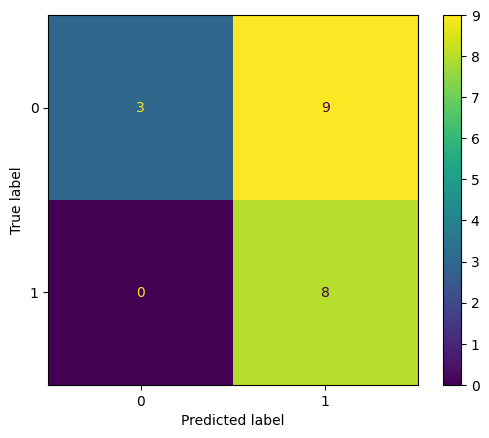

In [46]:
# 1. Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_proba are defined
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary class labels (threshold = 0.5)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4751 - loss: 0.6982 - val_accuracy: 0.4597 - val_loss: 0.6986
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5134 - loss: 0.6915 - val_accuracy: 0.4597 - val_loss: 0.7010
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5652 - loss: 0.6908 - val_accuracy: 0.4677 - val_loss: 0.7038
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5538 - loss: 0.6849 - val_accuracy: 0.4677 - val_loss: 0.7065
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5218 - loss: 0.6896 - val_accuracy: 0.4677 - val_loss: 0.7076
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5582 - loss: 0.6889 - val_accuracy: 0.4355 - val_loss: 0.7080
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4726 - loss: 0.6929 - val_accuracy: 0.4274 - val_loss: 0.7078
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5270 - loss: 0.6942 - val_accuracy: 0.4274 - val_loss

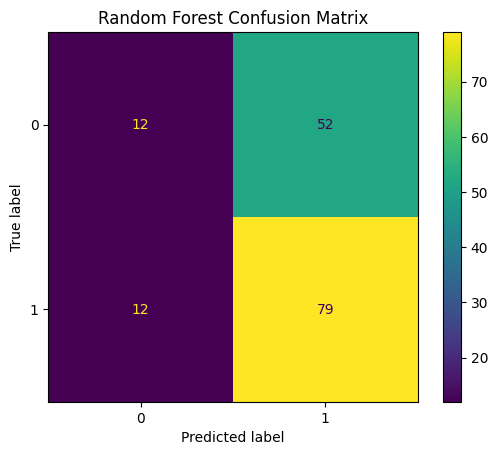

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


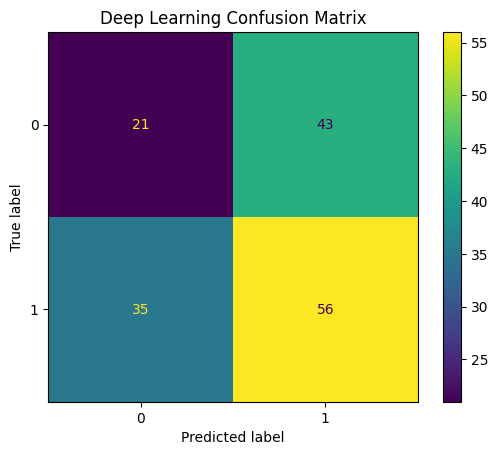

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Deep Learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate Random Forest and Deep Learning Models
# Random Forest Confusion Matrix
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# Deep Learning Confusion Matrix
y_pred_dl = (model.predict(X_test) > 0.5).astype("int32")
cm_dl = confusion_matrix(y_test, y_pred_dl)
disp_dl = ConfusionMatrixDisplay(confusion_matrix=cm_dl)
disp_dl.plot()
plt.title('Deep Learning Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


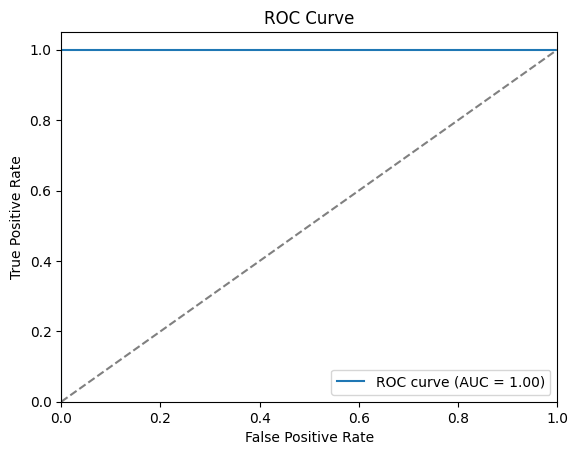

In [48]:
# 2. ROC Curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities
y_pred_proba = model.predict(X_test)  # Use predict, not predict_proba

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


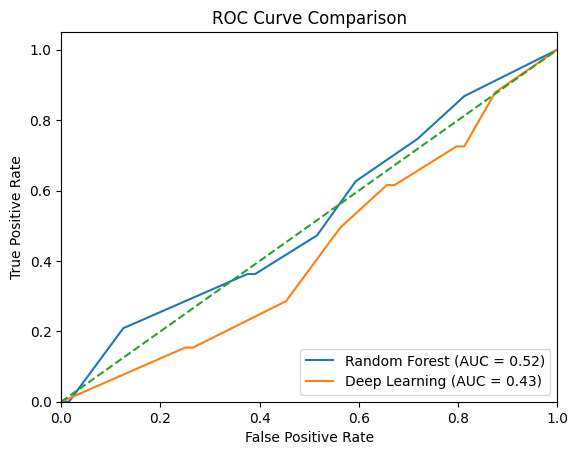

In [17]:
from sklearn.metrics import roc_curve, auc

# Random Forest ROC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Deep Learning ROC Curve
y_pred_proba_dl = model.predict(X_test)
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_proba_dl)
roc_auc_dl = auc(fpr_dl, tpr_dl)

plt.plot(fpr_dl, tpr_dl, label=f'Deep Learning (AUC = {roc_auc_dl:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


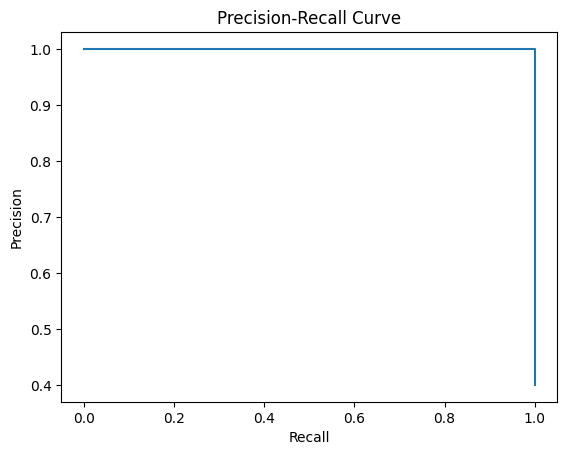

In [53]:
# 3. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities using model.predict (for binary classification)
y_pred_proba = model.predict(X_test)  # Use predict

# Get precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

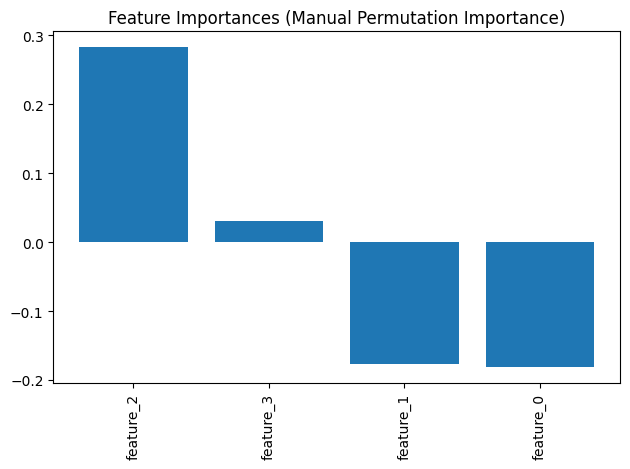

In [58]:
# 4. Feature Importance (Random Forest or Tree-Based Models)
import pandas as pd

# Assuming feature_names is defined or you know the column names
feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]  # If feature names are not defined

X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Use feature_names from the DataFrame
plt.figure()
plt.title("Feature Importances (Manual Permutation Importance)")
plt.bar(range(X_train_df.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_df.shape[1]), X_train_df.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [62]:
# 5. Learning Curve
!pip install tensorflow



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


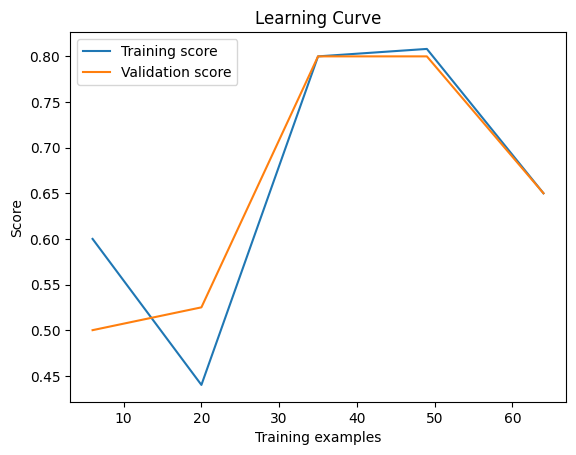

In [64]:
# 5. Learning Curve
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.base import BaseEstimator, ClassifierMixin

# Custom wrapper to make the Keras model compatible with scikit-learn
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, epochs=10, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn()  # Build the Keras model
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return (self.model.predict(X) >= 0.5).astype(int)  # Apply threshold for binary classification

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=self.verbose)[1]  # Return accuracy

# Function to build the Keras model
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model using the custom wrapper
model = KerasClassifierWrapper(build_fn=build_model, epochs=10, batch_size=32, verbose=0)

# Generate learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=5)

# Plot the learning curve
train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Validation score')
plt.ylabel('Score')
plt.xlabel('Training examples')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [68]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.8 MB/s eta 0:00:00


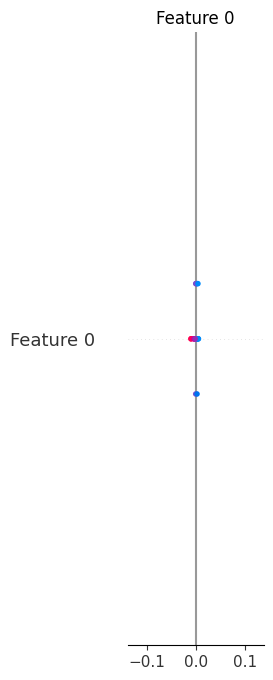

In [77]:
# 6. SHAP Feature Importance Plot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import shap

# Define and compile your Keras model (example)
keras_model = Sequential()
keras_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
keras_model.add(Dropout(0.5))
keras_model.add(Dense(1, activation='sigmoid'))
keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the Keras model
keras_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Initialize SHAP DeepExplainer with the trained Keras model
explainer = shap.DeepExplainer(keras_model, X_train)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)



In [82]:
# 7. Correlation Heatmap



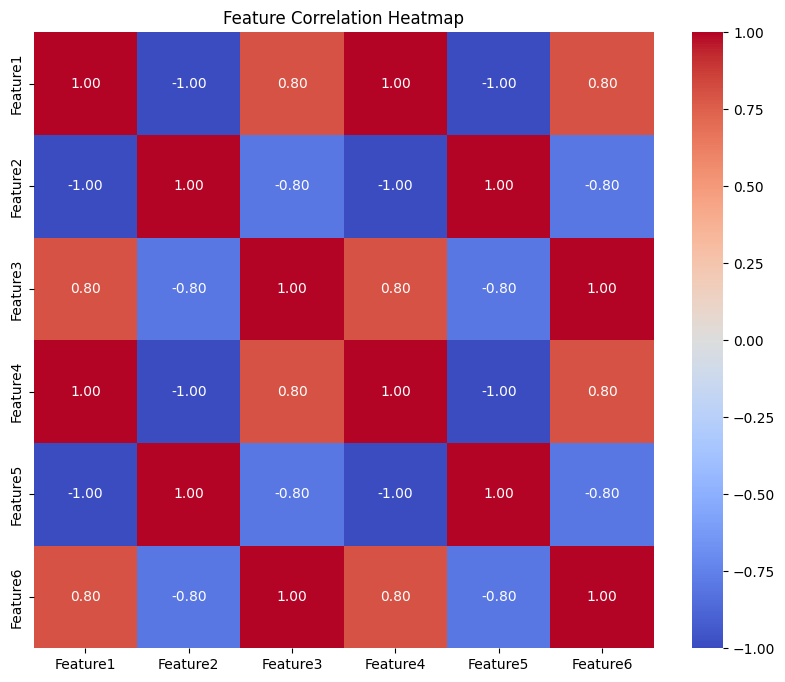

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

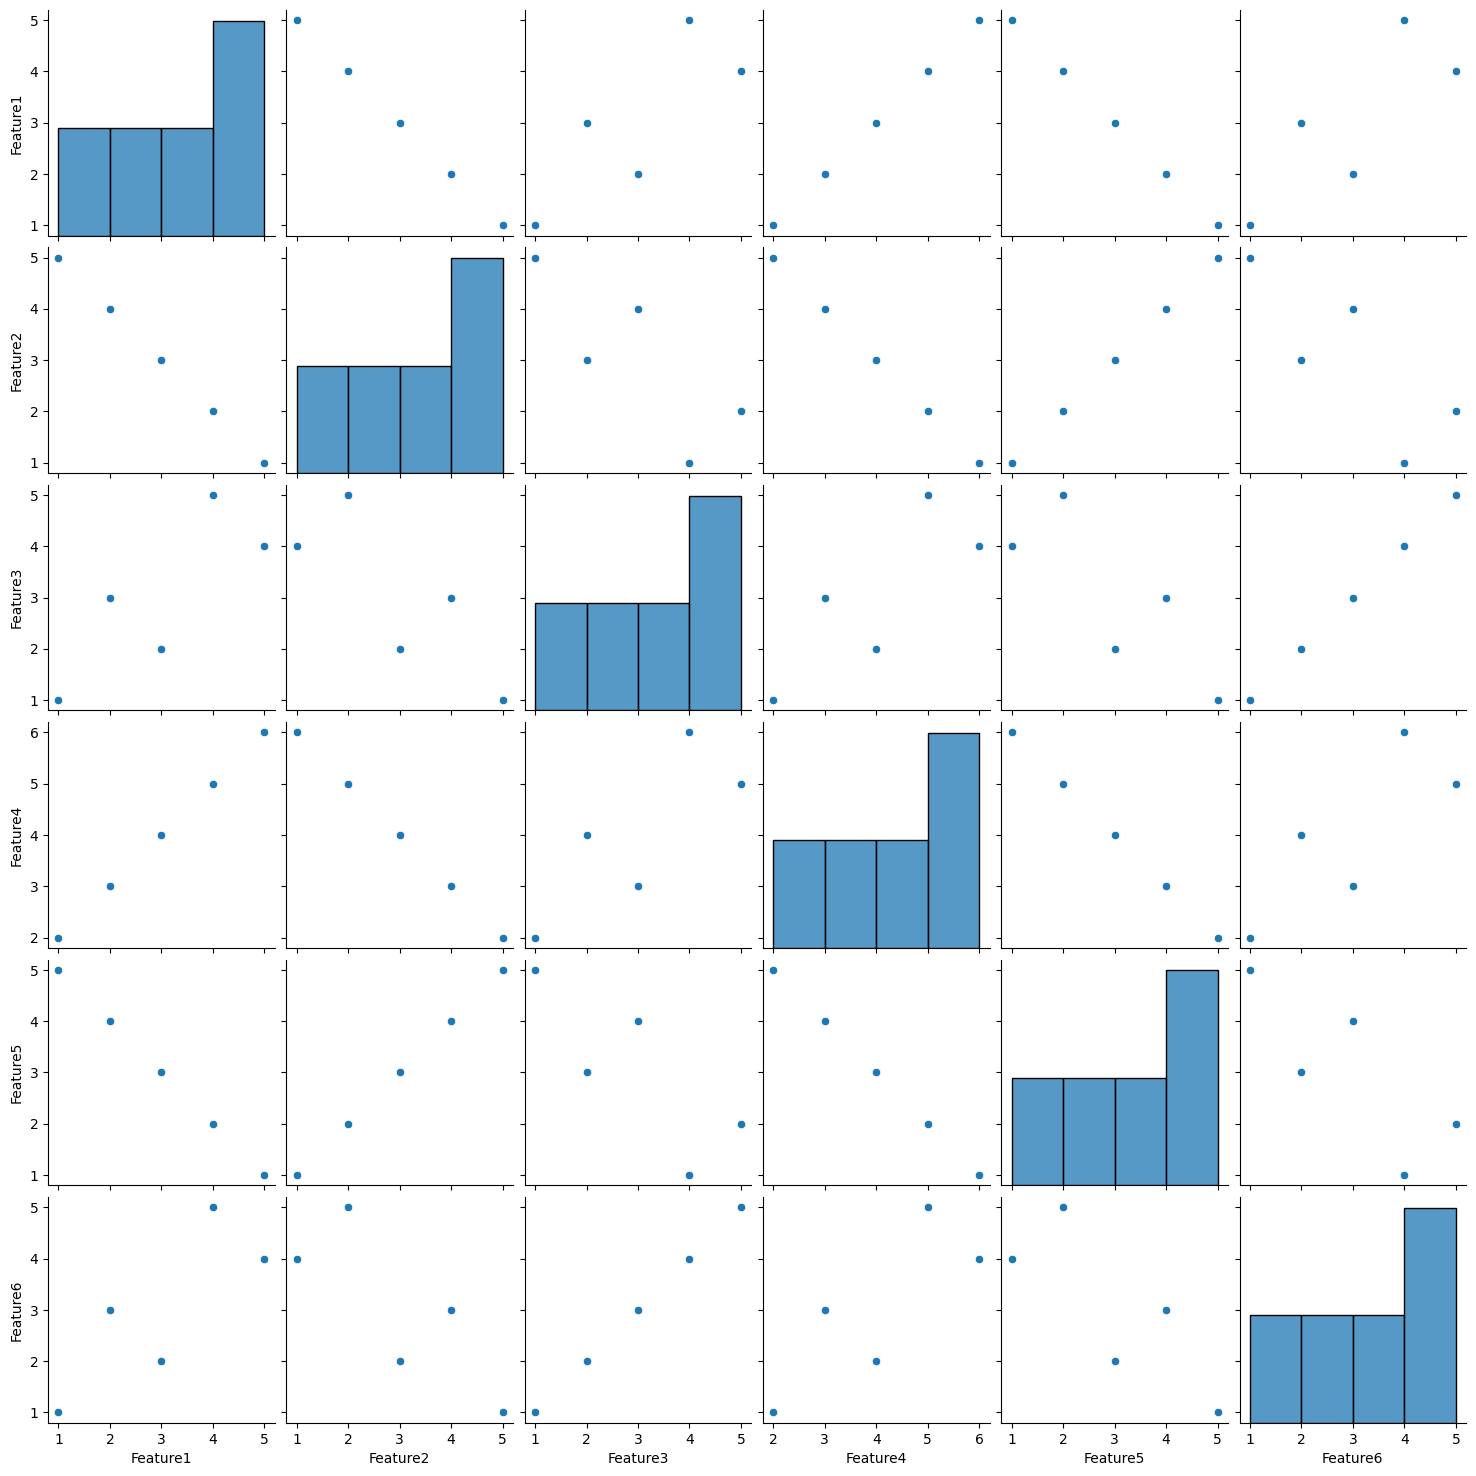

In [84]:
#8. Pair Plot
sns.pairplot(df)
plt.show()

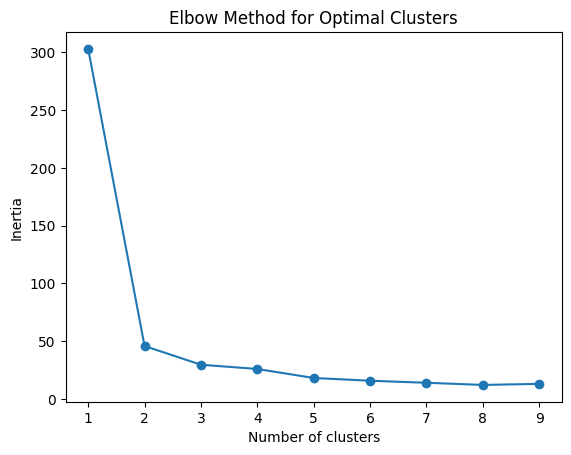

In [87]:
#9. Elbow Method for K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Run KMeans for different numbers of clusters
inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n).fit(X)
    inertia.append(kmeans.inertia_)

# Plot inertia to find the "elbow"
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


y_pred shape: (20,)
residuals shape: (400,)


/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


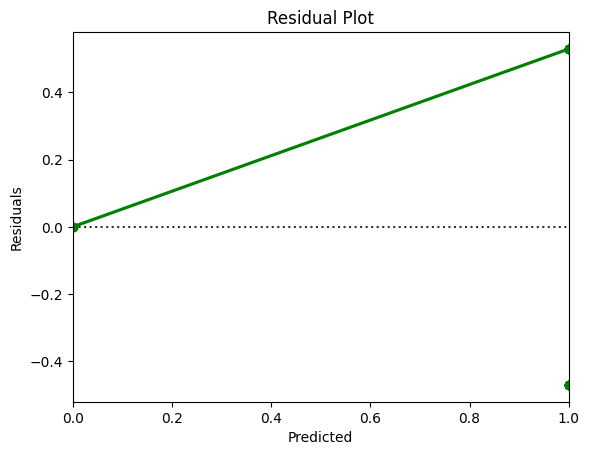

In [93]:
# 11. Residual Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined
print(f"y_pred shape: {y_pred.shape}")
print(f"residuals shape: {residuals.shape}")

# Make sure that y_pred and residuals are 1D arrays and have matching lengths
y_pred = y_pred.ravel()[:len(y_test)]  # Ensure the length matches y_test
residuals = (y_test - y_pred).ravel()  # Ensure residuals are calculated properly and are 1D

# Plot residuals
sns.residplot(x=y_pred, y=residuals, lowess=True, color='g')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
